In [60]:
import pandas as pd
from pandasql import sqldf

# Read the CSV file into a DataFrame
df = pd.read_csv('summary_ideas_results.csv')

# Define the pandasql environment
pysqldf = lambda q: sqldf(q, globals())

# SQL query
query = """
    SELECT 
    place_name, 
    count(*) as review_count,
    avg(rating)as rating_avg,
    sum(case when friendly='Yes'then 1 else 0 end) as friendly_count,
    sum(case when summary_idea='Positive - Nice place'then 1 else 0 end) as nice_place_count,
     sum(case when summary_idea='Positive - Good food'then 1 else 0 end) as good_food_count
    FROM df
    group by 1
"""

# Execute the query
result_df = pysqldf(query)

# Display the result DataFrame
print(result_df)


                                                                       place_name  \
0                                                          Amigo Grill Restaurant   
1                                                               Amigo Rozengracht   
2                                                                           BREDA   
3                                                                  Black and Blue   
4                                                                            Bleu   
5                                                    Café restaurant van Kerkwijk   
6                                                       Café-Restaurant Amsterdam   
7                                                                     De Plantage   
8                                                              Lumbini Restaurant   
9                                                                        Maydanoz   
10                                                             Me

/var/folders/9j/y8g5t08s68x3k532hzygdfdh0000gn/T/ipykernel_44142/47198160.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


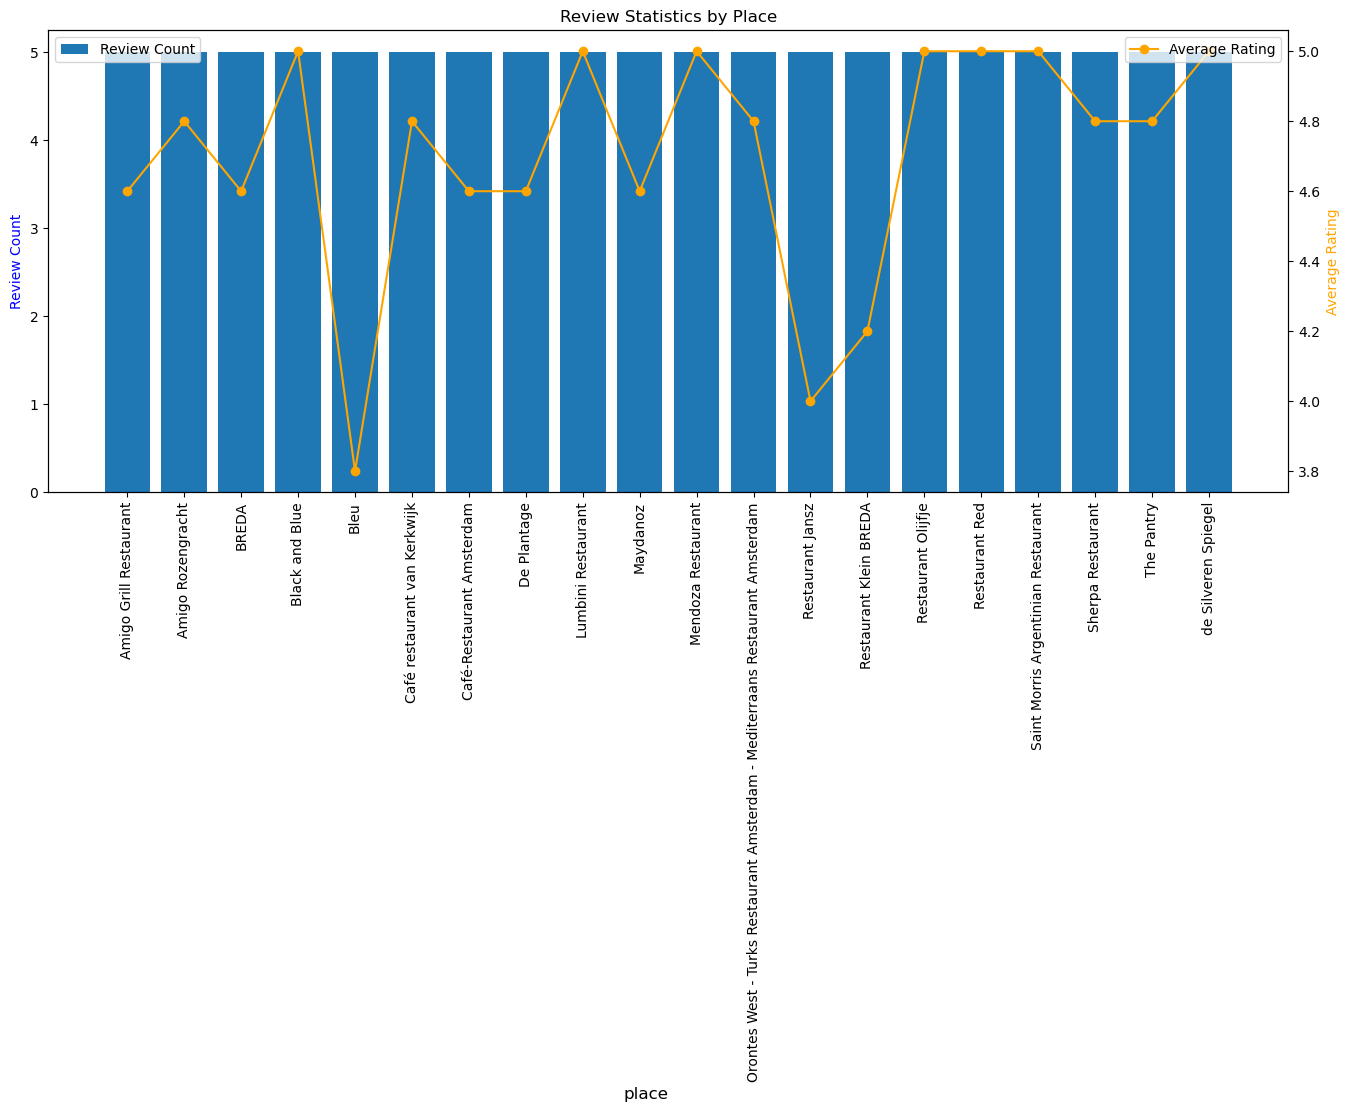

In [19]:
import matplotlib.pyplot as plt

# Increase figure size
fig, ax1 = plt.subplots(figsize=(16, 6))

# Bar plot for review count and positive reviews
ax1.bar(result_df['place_name'], result_df['review_count'], label='Review Count')

# Line plot for average rating
ax2 = ax1.twinx()
ax2.plot(result_df['place_name'], result_df['rating_avg'], color='orange', label='Average Rating', marker='o')

# Rotate x-axis labels by 90 degrees
ax1.tick_params(axis='x', rotation=90)

# Set labels and title
ax1.set_xlabel('place',  ha='right',fontsize=12)
ax1.set_ylabel('Review Count', color='blue')
ax2.set_ylabel('Average Rating', color='orange')
plt.title('Review Statistics by Place')

# Display legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/9j/y8g5t08s68x3k532hzygdfdh0000gn/T/ipykernel_44142/799010325.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


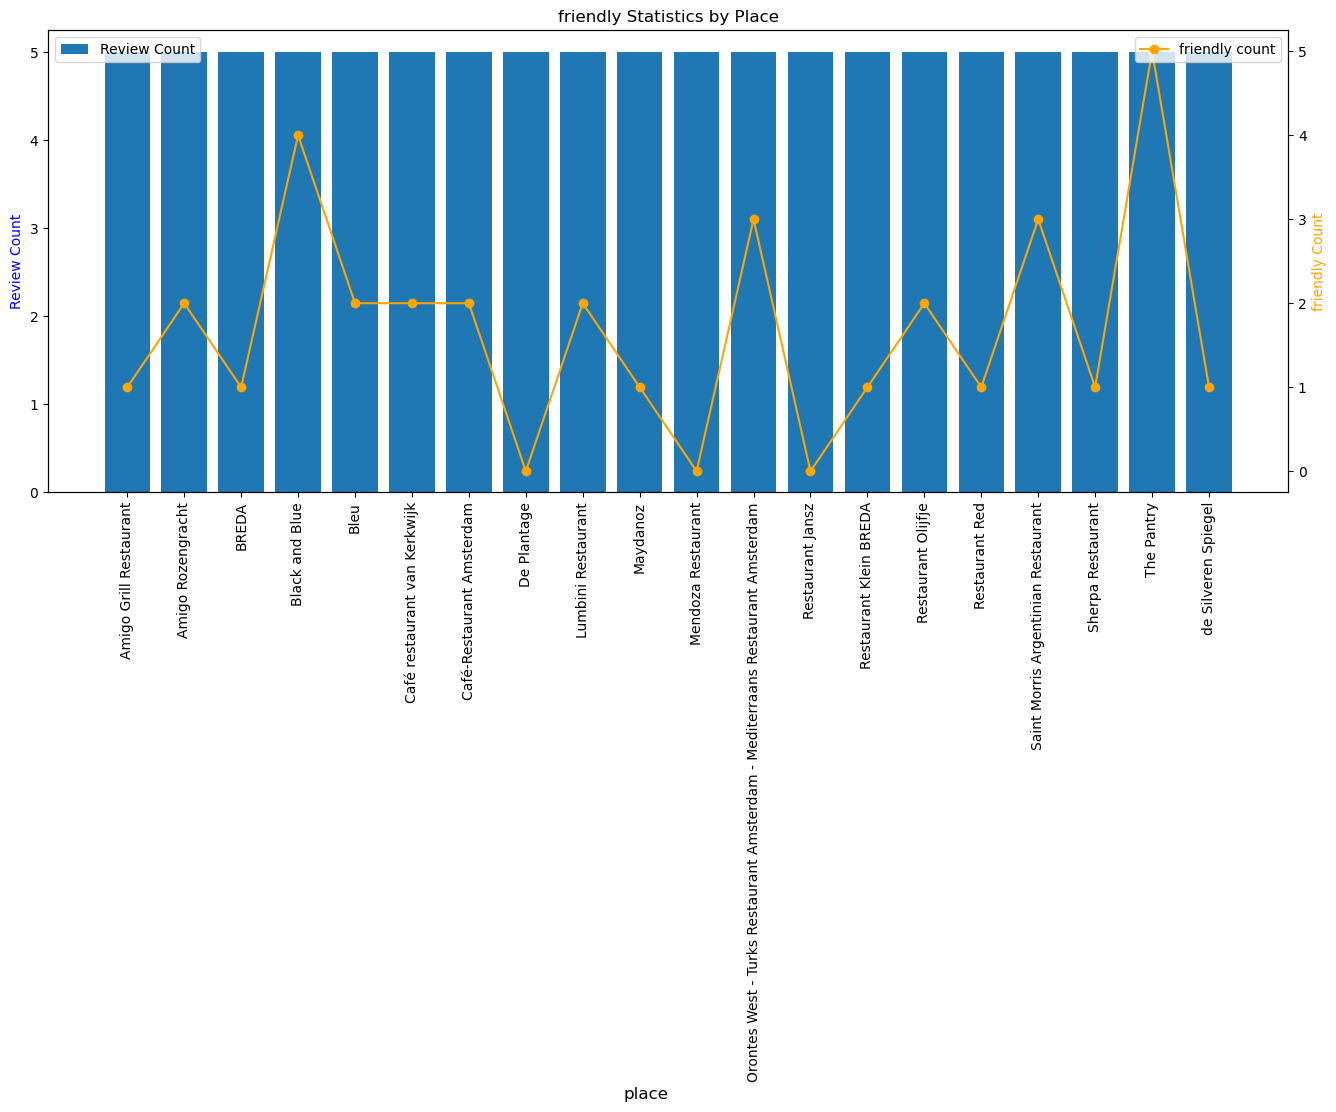

In [32]:
# Increase figure size
fig, ax1 = plt.subplots(figsize=(16, 6))

# Bar plot for review count and positive reviews
ax1.bar(result_df['place_name'], result_df['review_count'], label='Review Count')

# Line plot for average rating
ax2 = ax1.twinx()
ax2.plot(result_df['place_name'], result_df['friendly_count'], color='orange', label='friendly count', marker='o')

# Rotate x-axis labels by 90 degrees
ax1.tick_params(axis='x', rotation=90)

# Set labels and title
ax1.set_xlabel('place',  ha='right',fontsize=12)
ax1.set_ylabel('Review Count', color='blue')
ax2.set_ylabel('friendly Count', color='orange')
plt.title('friendly Statistics by Place')

# Display legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

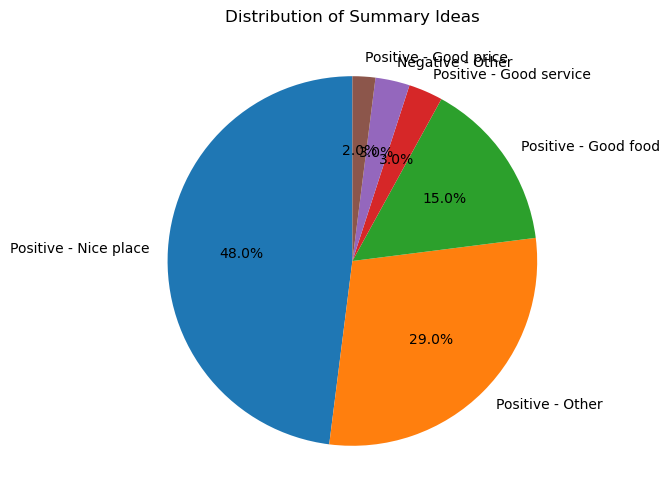

In [58]:
# Count occurrences of each unique value in 'summary_idea' column
summary_idea_counts = df['summary_idea'].value_counts()

# Plot a smaller pie chart in a blue color scheme
plt.figure(figsize=(6, 6))
plt.pie(summary_idea_counts, labels=summary_idea_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Summary Ideas')
plt.show()

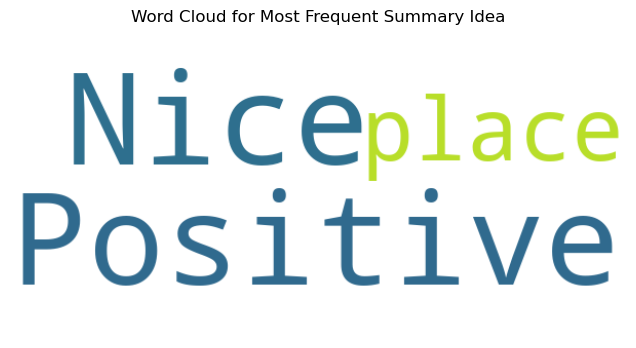

In [48]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get unique values and their counts in 'summary_idea' column
unique_summary_ideas = df['summary_idea'].value_counts()

# Select the most frequent 'summary_idea'
most_frequent_summary_idea = unique_summary_ideas.index[0]

# Generate the word cloud for the most frequent 'summary_idea'
wordcloud = WordCloud(width=600, height=300, background_color='white').generate(most_frequent_summary_idea)

# Plot the WordCloud image                        
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f'Word Cloud for Most Frequent Summary Idea')
plt.axis('off')
plt.show()


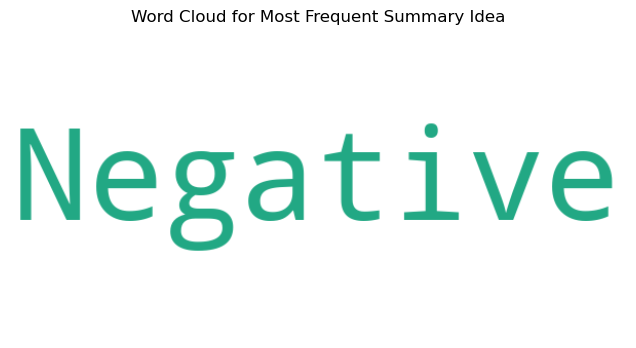

In [49]:

# Filter the DataFrame by specific places and rating < 3
filtered_df = df[(df['place_name'].isin(['Bleu', 'Restaurant Jansz','Restaurant Klein BREDA'])) & (df['rating'] < 3)]

# Get unique values and their counts in 'summary_idea' column
unique_summary_ideas = filtered_df['summary_idea'].value_counts()

# Select the most frequent 'summary_idea'
most_frequent_summary_idea = unique_summary_ideas.index[0]

# Generate the word cloud for the most frequent 'summary_idea'
wordcloud = WordCloud(width=600, height=300, background_color='white').generate(most_frequent_summary_idea)

# Plot the WordCloud image                        
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f'Word Cloud for Most Frequent Summary Idea')
plt.axis('off')
plt.show()



In [72]:
# Define the pandasql environment
pysqldf = lambda q: sqldf(q, globals())

# SQL query
query = """
    SELECT 
    place_name, 
    rating as rating_avg,
    case when friendly='Yes'then 1 else 0 end as friendly_count,
    case when summary_idea='Positive - Nice place'then 1 else 0 end as nice_place_count,
    case when summary_idea='Positive - Good food'then 1 else 0 end as good_food_count
    FROM df
    group by 1
"""

# Execute the query
result_data = pysqldf(query)

# Display the result DataFrame
#print(result_data)


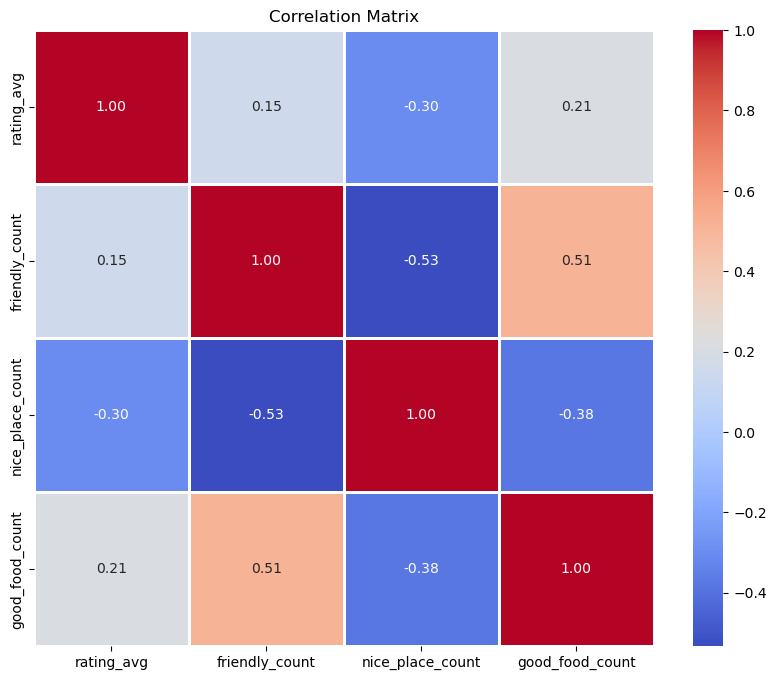

In [73]:
# Calculate correlation matrix
correlation_matrix = result_data[['rating_avg', 'friendly_count', 'nice_place_count', 'good_food_count']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Matrix')
plt.show()



The correlation coefficients you provided (rating_avg with good_food, good_place, and friendly) are measures of the linear relationship between these variables. Here's how to interpret them:

Rating_avg and Good_food (0.21):
A positive correlation of 0.21 indicates a weak positive linear relationship between the average rating (rating_avg) and the count of positive reviews about good food (good_food_count).
As the count of positive reviews about good food increases, the average rating tends to increase slightly.
Rating_avg and Good_place (-0.3):
A negative correlation of -0.3 indicates a moderate negative linear relationship between the average rating (rating_avg) and the count of positive reviews about a nice place (nice_place_count).
As the count of positive reviews about a nice place increases, the average rating tends to decrease moderately.
Rating_avg and Friendly (0.15):
A positive correlation of 0.15 indicates a weak positive linear relationship between the average rating (rating_avg) and the count of reviews mentioning friendliness (friendly_count).
As the count of reviews mentioning friendliness increases, the average rating tends to increase slightly.
Interpretation:

The positive correlation with good_food suggests that positive reviews about good food are associated with a slightly higher average rating.
The negative correlation with good_place suggests that positive reviews about a nice place are associated with a moderately lower average rating.
The positive correlation with friendly suggests that reviews mentioning friendliness are associated with a slightly higher average rating.
Keep in mind that correlation does not imply causation, and other factors not considered in the analysis may influence these relationships. Additionally, the strength of correlations (weak, moderate, strong) can vary based on the context and the specific data being analyzed.

In [50]:
# Set pandas display option to show the entire 'text' column
pd.set_option('display.max_colwidth', None)

# Print the 'text' column for the filtered DataFrame
print(filtered_df['text'])


43    Mediocre food + VERY slow service = skip. The food was okay, some of them were quite enjoyable like the tomato dish and the cabbage, but definitely not outstanding. The main dish duck was pretty gross. Neither our table nor the table next to us finished it. The service here was the worst. The waitress had a good attitude and the pacing overall was just so painfully slow. We came here for a 5-course lunch and after an hour, only the first course came. Definitely skip this place - not worth the money or the time by any means.
59                                                                                                                                                                                                                                                                      We arrived for lunch with our baby and have been first surprised that there was no children seat. Then we ordered our lunch and they charge for extra fries and serve it without mayonnaise. We asked se